<a href="https://colab.research.google.com/github/byrocuy/REA-AI_Mastery/blob/main/week-2/session-3/00_machine_learning_fundamental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning

## Supervised vs Unsupervised vs Semi-supervised

### Supervised

Target/label is given, e.g.

|Height | Weight (Label) |
| --- | ------ |
| 180 | 80 |
| 160 | 60 |
| 170 | 70 |
| 190 | 90 |

Task: Given height (feature/attribute), predict the weight

Example: Linear regression, logistic regression, decision tree, random forest, support vector machine, neural network

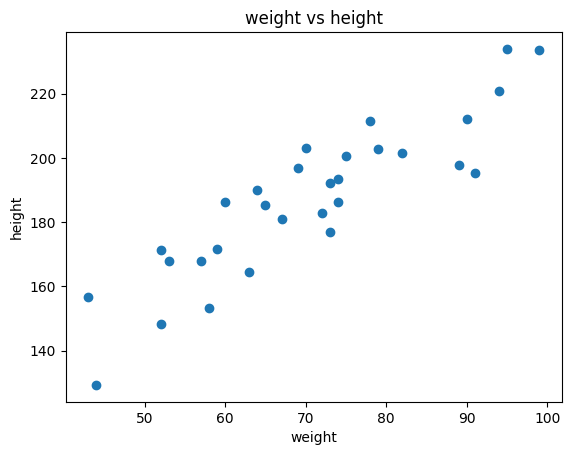

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

weight = np.random.randint(40, 100, 30)
height = np.sqrt(weight / 20) * 100 + np.random.randint(-20, 20, 30)

# plot
plt.scatter(weight, height)
plt.xlabel('weight')
plt.ylabel('height')
plt.title('weight vs height')
plt.show()



Problem: How to predict the weight of a person with height 175cm?

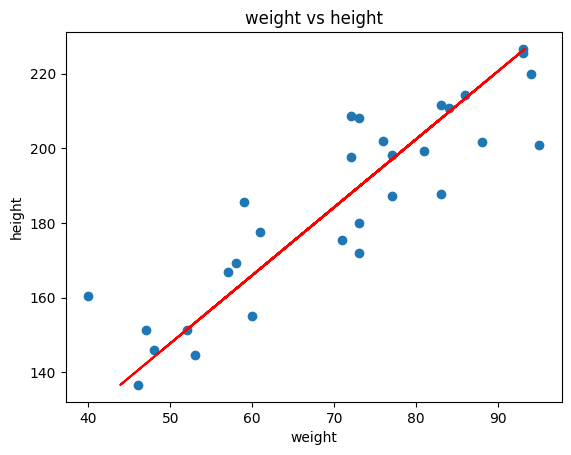

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

weight = np.random.randint(40, 100, 30)
height = np.sqrt(weight / 20) * 100 + np.random.randint(-20, 20, 30)

# implement linear regression using scikit to predict weight from height
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(height.reshape(-1, 1), weight)
weight_pred = model.predict(height.reshape(-1, 1))


# plot
plt.scatter(weight, height)
plt.xlabel('weight')
plt.ylabel('height')
plt.title('weight vs height')

# plot the regression line
plt.plot(weight_pred, height, color='red')
plt.show()



### Unsupervised

Label is not given, the task is to find the pattern in the data, e.g. anomaly detection, clustering




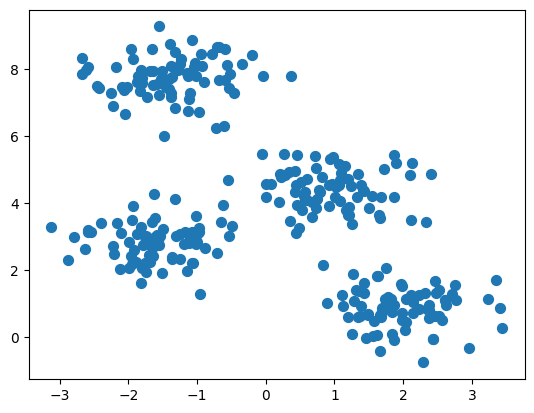

In [ ]:
# Create a sample of clustering data

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

Without any label or target, predict which data belongs to which cluster

/Users/ruangguru/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


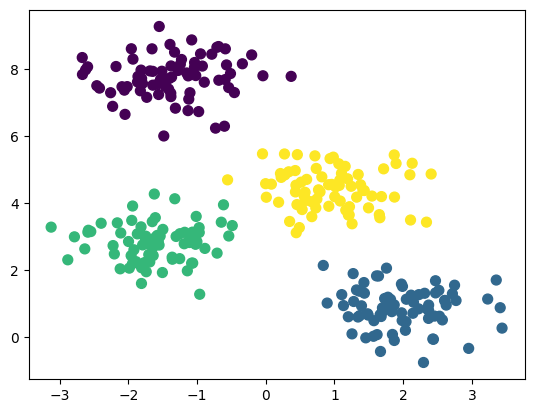

In [ ]:
# Create a sample of clustering data

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Implement K-NN clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Plot the clustering result
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
plt.show()

### Semi Supervised

Combination of unsupervised and supervised learning

Example: Google Photos

- Unsupervised: Grouping photos based on the face
- Supervised: Ask the user to label the face with name

![Google Photo](https://storage.googleapis.com/support-forums-api/attachment/message-98489306-15452541684849637976.jpg)

## Overfitting

The model doesn't generalize well, it memorizes the training data

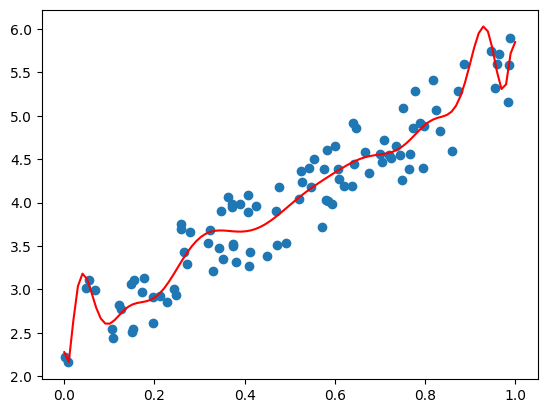

In [ ]:
# Create a sample X and Y data

import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
X = np.random.rand(100, 1)
y = 2 + 3 * X + np.random.rand(100, 1)

# Make a overfit regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(20), LinearRegression())
model.fit(X, y)

# Plot the data
plt.scatter(X, y)

# draw the model
X_test = np.linspace(0, 1, 100)
y_pred = model.predict(X_test.reshape(-1, 1))
plt.plot(X_test, y_pred, color='red')

plt.show()

## Training Set & Test Set



To prevent overfitting, we need to split the data into training set and test set

- Training set: used to train the model
- Test set: used to evaluate the model

When overfitting happen, the model will perform well on the training set but perform poorly on the test set

### Cross Validation

Cross validation is a technique to evaluate the model by splitting the data into training set and test set **multiple times**.

For example: 5-fold cross validation

- Split the data into 5 folds
- Train the model using 4 folds, evaluate the model using the remaining fold
- Repeat the process 5 times, each time use different fold as test set
- Calculate the average score

![Cross Validation](https://upload.wikimedia.org/wikipedia/commons/b/b5/K-fold_cross_validation_EN.svg)

## Regression vs Classification

### Regression

Predict continuous value, e.g. predict the weight of a person (as shown in the supervised learning example)

### Classification

Classify the data into different classes, e.g. classify the email into spam or not spam

In [ ]:
# Download MNIST dataset

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=True)


/Users/ruangguru/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X = mnist['data']
y = mnist['target']

print(X.shape, y.shape)

(70000, 784) (70000,)


In [ ]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

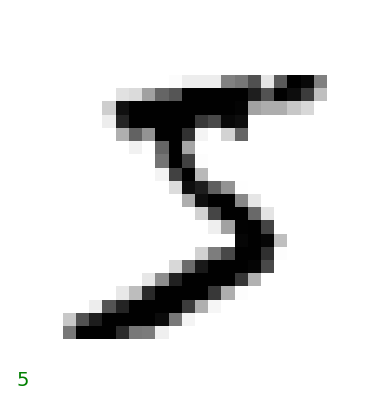

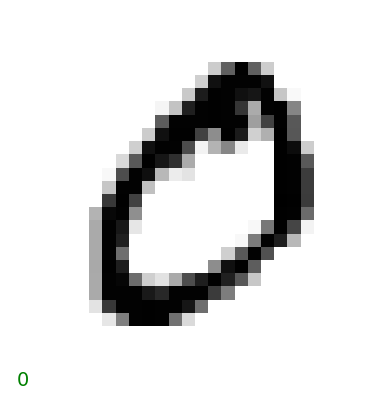

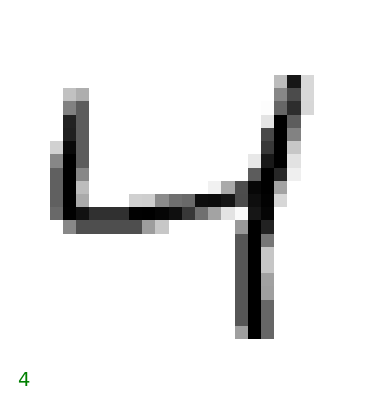

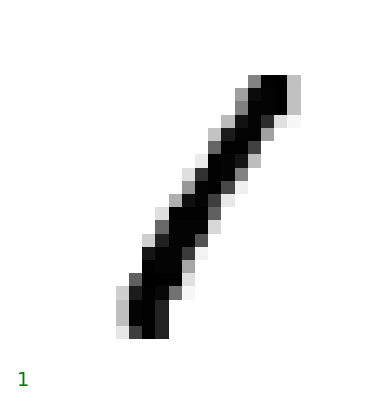

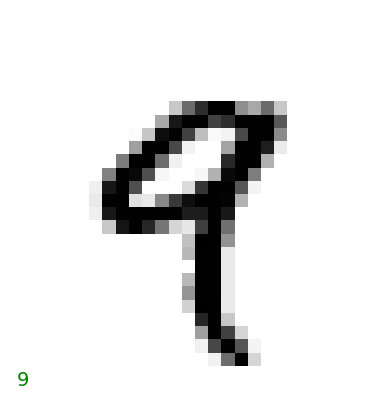

In [ ]:
# Plot the first 20 images

import matplotlib.pyplot as plt

for i in range(5):
    some_digit = X.iloc[i]
    some_digit_image = some_digit.values.reshape(28, 28)

    plt.imshow(some_digit_image, cmap='binary')
    plt.axis('off')

    # Draw label y on the bottom
    plt.text(0, 28, y[i], fontsize=14, color='g')
    plt.show()

This is classification problem.

Given images, classify the images into correct numbers

### Confusion Matrix

Classification matrix needs difrerent metrics to evaluate the model. And the objective metrics can be different for different problems.

Confusion matrix is a table to visualize the performance of the classification model

Example of Confusion Matrix

| | Predicted: Not Spam | Predicted: Spam |
| --- | ------ | ------ |
| Actual: Not Spam | True Negative | False Positive |
| Actual: Spam | False Negative | True Positive |


In [ ]:
import matplotlib.pyplot as plt

# split the data into train and test
train_size = 60000
train_X, test_X = X[:train_size], X[train_size:]
train_y, test_y = y[:train_size], y[train_size:]

is_7_train = train_y == '7'
is_7_test = test_y == '7'

# Train the model
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_X, is_7_train)


SGDClassifier(random_state=42)

In [ ]:
# Draw confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = sgd_clf.predict(test_X)
cm = confusion_matrix(is_7_test, y_pred)
print(cm)


[[8902   70]
 [ 107  921]]


#### False Positive

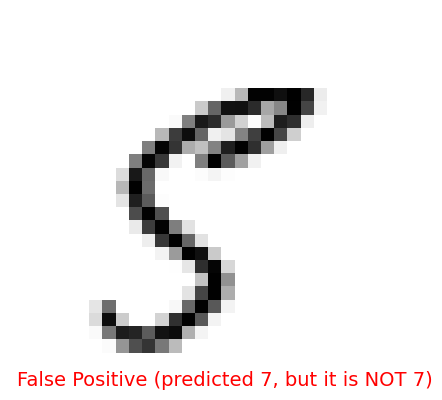

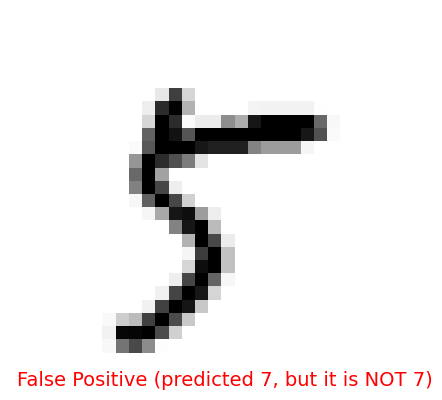

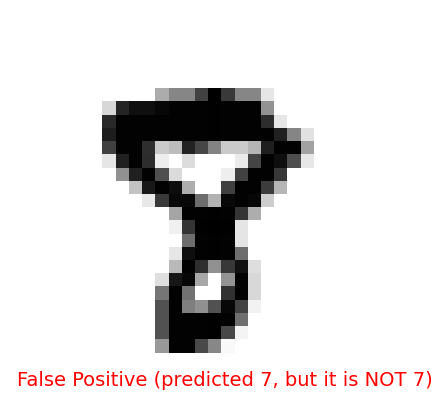

In [ ]:
# Draw the false positive

import matplotlib.pyplot as plt

false_positive = (is_7_test == False) & (y_pred == True)
false_positive_images = test_X[false_positive]

for i in range(3):
    some_digit = false_positive_images.iloc[i]
    some_digit_image = some_digit.values.reshape(28, 28)

    plt.imshow(some_digit_image, cmap='binary')
    plt.axis('off')

    # Draw label y on the bottom
    plt.text(0, 28, 'False Positive (predicted 7, but it is NOT 7)', fontsize=14, color='r')
    plt.show()

#### False Negative

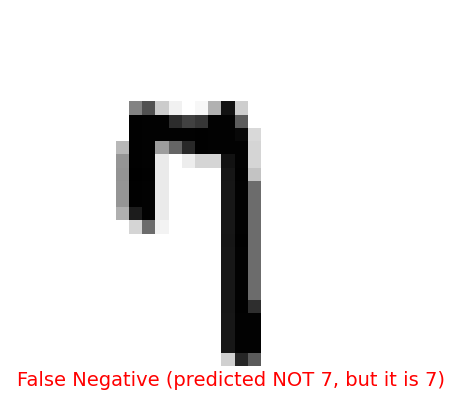

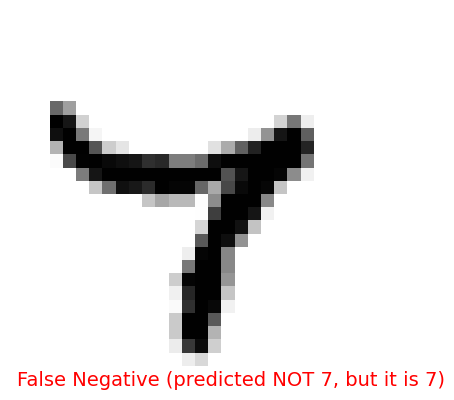

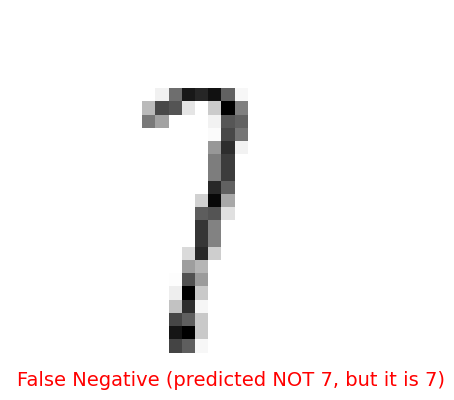

In [ ]:
# Draw the false negative

import matplotlib.pyplot as plt

false_negative = (is_7_test == True) & (y_pred == False)
false_negative_images = test_X[false_negative]

for i in range(3):
    some_digit = false_negative_images.iloc[i]
    some_digit_image = some_digit.values.reshape(28, 28)

    plt.imshow(some_digit_image, cmap='binary')
    plt.axis('off')

    # Draw label y on the bottom
    plt.text(0, 28, 'False Negative (predicted NOT 7, but it is 7)', fontsize=14, color='r')
    plt.show()

#### True Negative

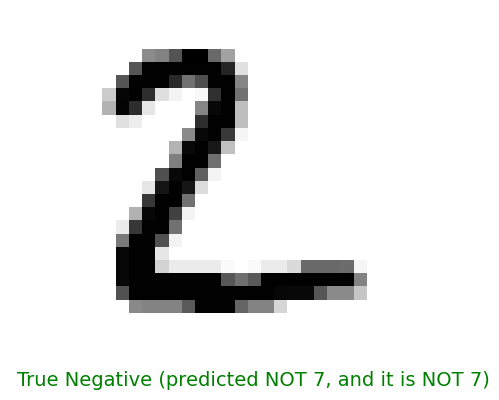

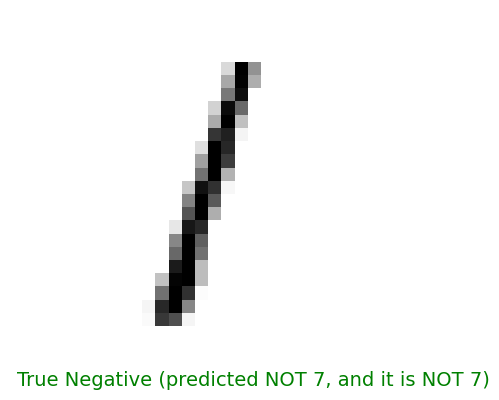

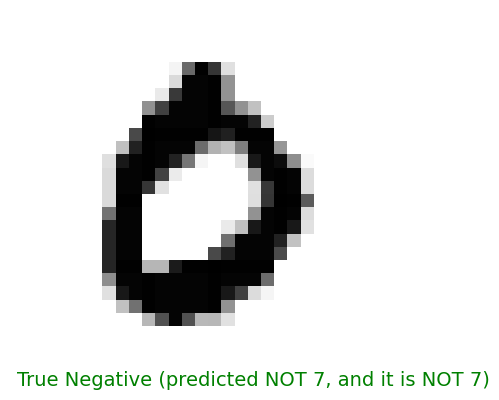

In [ ]:
# Draw the true negative

import matplotlib.pyplot as plt

true_negative = (is_7_test == False) & (y_pred == False)
true_negative_images = test_X[true_negative]

for i in range(3):
    some_digit = true_negative_images.iloc[i]
    some_digit_image = some_digit.values.reshape(28, 28)

    plt.imshow(some_digit_image, cmap='binary')
    plt.axis('off')

    # Draw label y on the bottom
    plt.text(0, 28, 'True Negative (predicted NOT 7, and it is NOT 7)', fontsize=14, color='g')
    plt.show()

#### True Positive

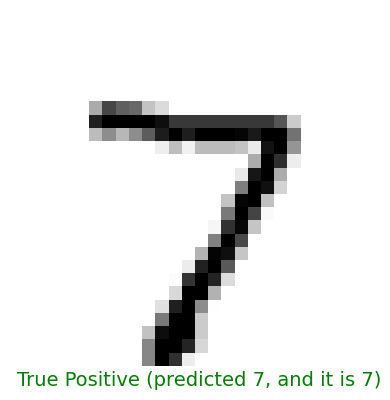

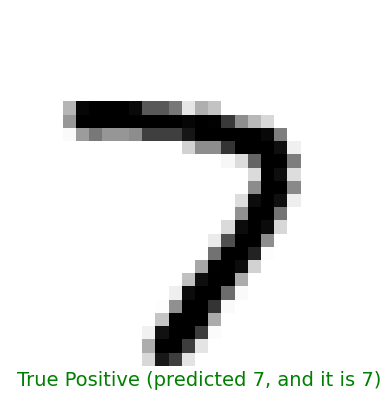

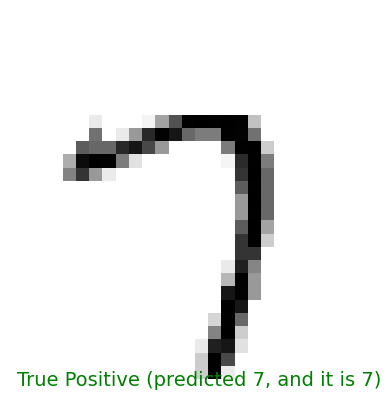

In [ ]:
# Draw the true positive

import matplotlib.pyplot as plt

true_positive = (is_7_test == True) & (y_pred == True)
true_positive_images = test_X[true_positive]

for i in range(3):
    some_digit = true_positive_images.iloc[i]
    some_digit_image = some_digit.values.reshape(28, 28)

    plt.imshow(some_digit_image, cmap='binary')
    plt.axis('off')

    # Draw label y on the bottom
    plt.text(0, 28, 'True Positive (predicted 7, and it is 7)', fontsize=14, color='g')
    plt.show()

### Why not use accuracy?

Accuracy may not be a good metric for classification problem, because the data can be imbalanced.

For example:

- 99% of the email is not spam
- 1% of the email is spam

If the model always predict the email as not spam, the accuracy is 99%. But the model is not useful at all.

Confusion Matrix:

| | Predicted: Not Spam | Predicted: Spam |
| --- | ------ | ------ |
| Actual: Not Spam | 99 | 0 |
| Actual: Spam | 1 | 0 |

Or in our MNIST example:

When we want to classify if the image is number 7 or not, a model that always predict the image as not 7 will have 90% accuracy.

Confusion Matrix:

| | Predicted: Not 7 | Predicted: 7 |
| --- | ------ | ------ |
| Actual: Not 7 | 90 | 0 |
| Actual: 7 | 10 | 0 |


### Precision & Recall

We need other metrics!

\begin{align*}
\text{Recall} &= \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}} \\
\text{Precision} &= \frac{\text{True Positive}}{\text{True Positive} + \text{False Positive}}
\end{align*}

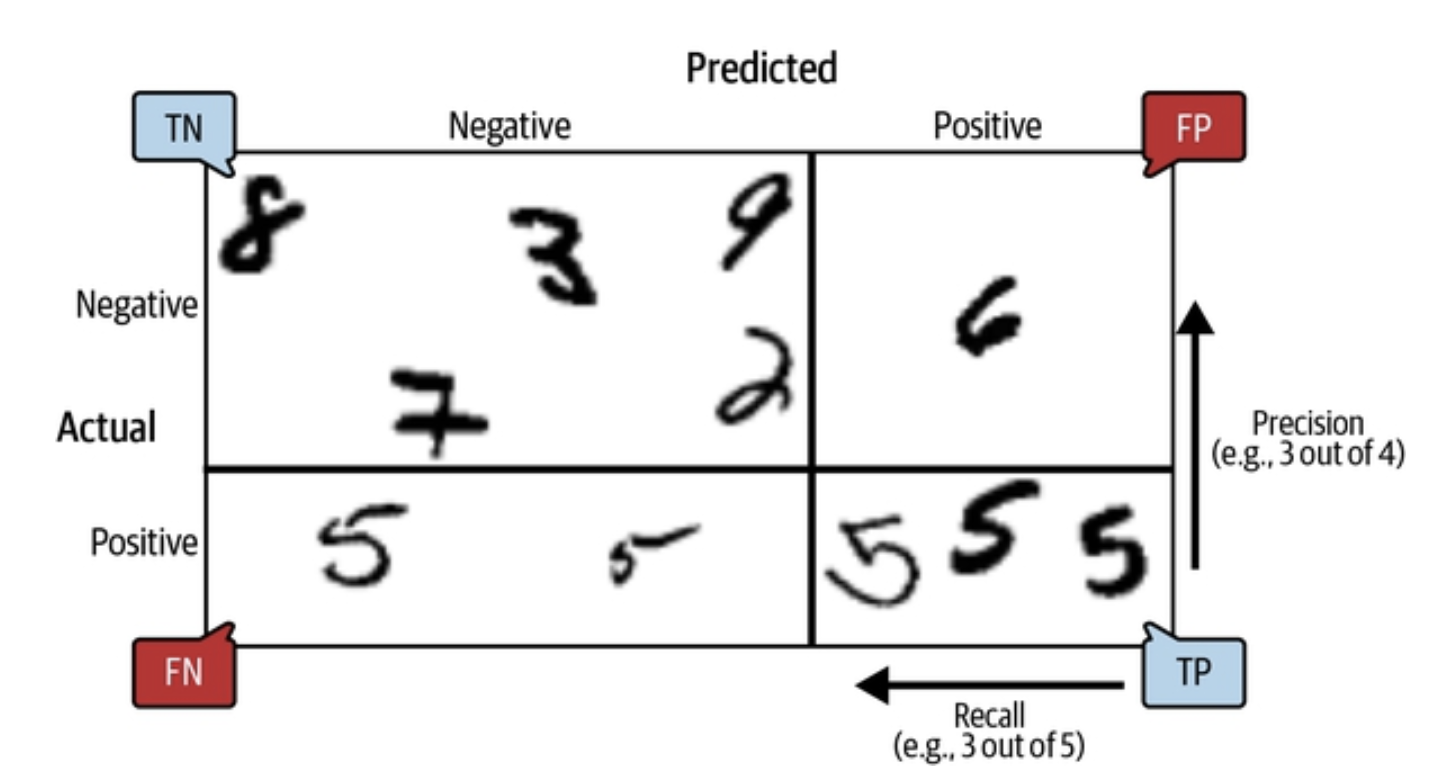
Source: Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition


Example:

| | Predicted: Not 7 | Predicted: 7 |
| --- | ------ | ------ |
| Actual: Not 7 | 90 | 0 |
| Actual: 7 | 10 | 0 |

- Recall = 0 / (0 + 10) = 0
- Precision = 0 / (0 + 0) = 0

#### Perfect Recall

Confusion Matrix:

| | Predicted: Not 7 | Predicted: 7 |
| --- | ------ | ------ |
| Actual: Not 7 | 0 | 90 |
| Actual: 7 | 0 | 10 |

If our model always predict ALL image as 7, the recall will be 100% (10 / (10 + 0) = 1).

Perfect recall means that the model will never miss any 7, but it will also predict many non-7 as 7.

```
Q: Is "7" seven?
A: Yes, it is seven
Q: Is "7" seven?
A: Yes, it is seven
Q: Is "8" seven?
A: Yes, it is seven
Q: Is "9" seven?
A: Yes, it is seven
```

#### Perfect Precision

Confusion Matrix:

| | Predicted: Not 7 | Predicted: 7 |
| --- | ------ | ------ |
| Actual: Not 7 | 90 | 0 |
| Actual: 7 | 9 | 1 |

If our model is very careful and only predict the image as 7 when **it is very sure**, we will have a perfect precision.

Perfect precision means that when the model predict the image as 7, it is actually 7. But the model may miss a lot of 7s.

```
Q: Is "7" seven?
A: Yes, it is seven
Q: Is "8" seven?
A: No, it is not seven
Q: Is "9" seven?
A: No, it is not seven
Q: Is "7" seven?
A: No, it is not seven
Q: Is "7" seven?
A: No, it is not seven
```

### When to use precision and when to use recall?

It depends on the problem.

**High Recall**

- High Recall is prioritized when the cost of false negative is high.
- A false negative (a person who has cancer but is predicted as not having it) could lead to lack of treatment and dire health implications.
- A false positive (a person who doesn't have cancer but is predicted as having it) would lead to further tests, which might be stressful and costly but isn't immediately harmful.

**High Precision**

- High Precision is prioritized when the cost of false positives is high.
- A false positive (a legitimate transaction is incorrectly flagged as fraudulent), can lead to customer frustration.
- A false negative (missing a fraudulent transaction) may be deemed more acceptable than annoying or alienating a large number of genuine customers.

### F1 Score

F1 score is a metric that combines precision and recall.

The formula for F1 score is:

$$F1 = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}$$

The `F1` score favors classifiers that have similar precision and recall. This is not always what you want: in some contexts you mostly care about precision, and in other contexts you really care about recall.
